In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
from google.colab import drive;
drive.mount('/content/drive')

Mounted at /content/drive


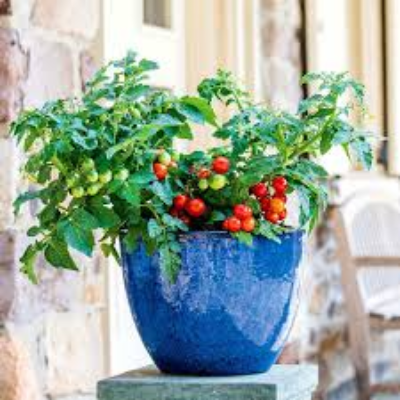

In [13]:
image_path='/content/drive/MyDrive/Apples_tomatos_classification_dataset/test/tomatoes/img_p1_58.jpeg'
import cv2;
from google.colab.patches import cv2_imshow
image=cv2.imread(image_path)
image=cv2.resize(image,(400,400))
cv2_imshow(image)


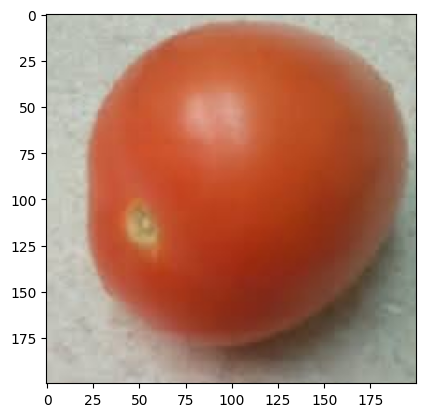

In [41]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
image_path='/content/drive/MyDrive/Apples_tomatos_classification_dataset/test/tomatoes/img_p1_43.jpeg'
img=image.load_img((image_path),target_size=(200,200))
plt.imshow(img)

In [42]:
datagen=ImageDataGenerator(
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)
datagen

In [45]:
img=image.img_to_array(img)
print(img.shape)
input_batch=img.reshape(1,200,200,3)
input_batch

(200, 200, 3)


array([[[[192., 198., 188.],
         [192., 198., 188.],
         [191., 197., 187.],
         ...,
         [192., 198., 186.],
         [193., 199., 187.],
         [194., 200., 188.]],

        [[190., 196., 186.],
         [190., 196., 186.],
         [189., 195., 185.],
         ...,
         [192., 198., 186.],
         [193., 199., 187.],
         [193., 199., 187.]],

        [[186., 192., 182.],
         [186., 192., 182.],
         [187., 193., 183.],
         ...,
         [193., 199., 187.],
         [194., 200., 188.],
         [191., 197., 185.]],

        ...,

        [[191., 191., 183.],
         [192., 192., 184.],
         [192., 192., 184.],
         ...,
         [157., 167., 156.],
         [158., 168., 157.],
         [155., 166., 152.]],

        [[191., 191., 183.],
         [192., 192., 184.],
         [192., 192., 184.],
         ...,
         [163., 171., 160.],
         [163., 174., 160.],
         [158., 166., 153.]],

        [[197., 196., 191.],
       

In [49]:
i=0;
aug_path='/content/drive/MyDrive/Augmented_dataset/augmented_tomato_dataset'
for output in datagen.flow(
    input_batch,batch_size=1,save_to_dir=aug_path):
  i=i+1
  if i==10:
    break;

In [50]:
##train the model
import tensorflow as tf
from tensorflow.keras.preprocessing import image;
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
import glob
from glob2 import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,MaxPooling2D

In [54]:
folders=glob('/content/drive/MyDrive/Apples_tomatos_classification_dataset/train/*')
folders

['/content/drive/MyDrive/Apples_tomatos_classification_dataset/train/apples',
 '/content/drive/MyDrive/Apples_tomatos_classification_dataset/train/tomatoes']

In [55]:
numbers_of_class=len(folders)
numbers_of_class

2

In [63]:
##design the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

activation_type='relu'
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation=activation_type,input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation=activation_type))  # 修正：kernal_size -> kernel_size
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation=activation_type))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Flatten())
model.add(Dense(64,activation=activation_type))
model.add(Dense(1,activation='sigmoid'))

##mode and the summary
model.summary()





Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,169 (21.48 MB)

 Trainable params: 5,631,169 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

In [108]:
#compile the model
optimizer_type='adam'
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizer_type,
    metrics=['accuracy']
)

In [109]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

In [110]:
train_path='/content/drive/MyDrive/Apples_tomatos_classification_dataset/train'
training_set=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 294 images belonging to 2 classes.


In [111]:
testing_path='/content/drive/MyDrive/Apples_tomatos_classification_dataset/test'
test_set=test_datagen.flow_from_directory(
    testing_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 97 images belonging to 2 classes.


In [112]:
history=model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 606ms/step - accuracy: 0.8951 - loss: 0.2720 - val_accuracy: 0.7113 - val_loss: 0.9635
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 526ms/step - accuracy: 0.8792 - loss: 0.3331 - val_accuracy: 0.7938 - val_loss: 0.7339
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step - accuracy: 0.9204 - loss: 0.2184 - val_accuracy: 0.7423 - val_loss: 0.7427
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 426ms/step - accuracy: 0.9338 - loss: 0.1899 - val_accuracy: 0.7216 - val_loss: 0.5531
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.9484 - loss: 0.1436 - val_accuracy: 0.7732 - val_loss: 0.9794
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 425ms/step - accuracy: 0.8998 - loss: 0.1978 - val_accuracy: 0.7629 - val_loss: 0.7148
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 441ms/step - accuracy: 0.9408 - loss: 0.1457 - val_accuracy: 0.7835 - val_loss: 0.8027
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 601ms/step - accuracy: 0.9808 - loss: 0.0883 - val_accuracy: 0.

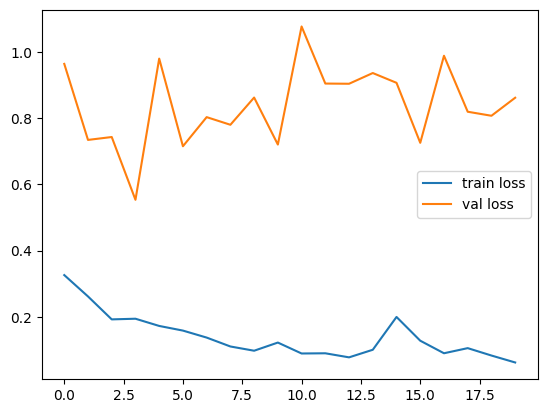

<Figure size 640x480 with 0 Axes>

In [113]:
import matplotlib.pyplot as plt
##Plot tne loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

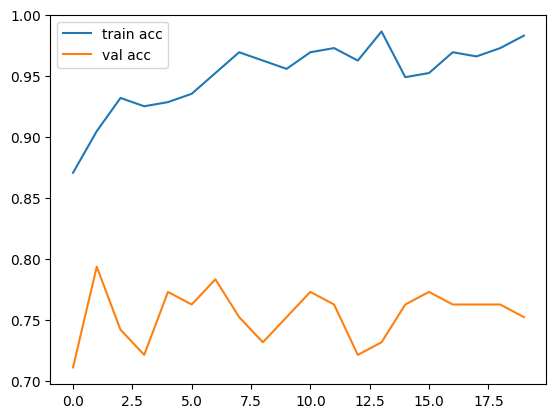

<Figure size 640x480 with 0 Axes>

In [114]:
##plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [115]:
model.evaluate(test_set)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7385 - loss: 0.9226 


[0.861257016658783, 0.7525773048400879]

In [116]:
model_save_path='/content/drive/MyDrive/Augmented_saved_models/inception_10_augmented_model.h5'
model.save(model_save_path)

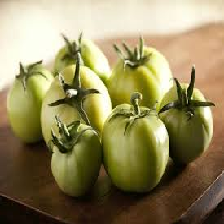

In [123]:
##Load the model
from tensorflow.keras.preprocessing import image
testing_image_path='/content/drive/MyDrive/Apples_tomatos_classification_dataset/test/tomatoes/img_p2_24.jpeg'
img=image.load_img(testing_image_path,target_size=(224,224))
img

In [124]:
x=image.img_to_array(img)
x=x/255
x=np.expand_dims(x,axis=0)
output=model.predict(x)
print(output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.9935283]]


In [125]:
x.shape

(1, 224, 224, 3)

In [126]:
output[0][0]

np.float32(0.9935283)

In [127]:
if output[0][0]>=0.5:
  prediction='Tomato'
  print(prediction)
else:
  prediction='Apple'
  print(prediction)

Tomato
